## Gradients

In [38]:
## Gradients in Tensorflow

import tensorflow as tf
import numpy as np

# Define the target vector
target_vector = tf.constant([-np.sqrt(2), np.sqrt(2)], dtype=tf.float32)

# Initialize the variable vector to be optimized
vector = tf.Variable([0.001, 0.0], dtype=tf.float32)

# Define the learning rate
learning_rate = 0.1
vector_steps = []
# Optimization loop
for step in range(1000):
    with tf.GradientTape() as tape:
        # Compute the dot product
        dot_product = tf.reduce_sum(target_vector * vector)
        # Define the loss as the square of the dot product
        loss = dot_product ** 2 + (1-tf.norm(vector, ord=2)) ** 2
    
    # Compute the gradients of the loss with respect to the vector
    gradients = tape.gradient(loss, [vector])
    
    # Update the vector using the gradients
    vector.assign_sub(learning_rate * gradients[0])
    vector_steps.append(vector.numpy())
    if step % 10 == 0:
        print(f"Step {step}: Vector = {vector.numpy()}, Loss = {loss.numpy()}")

# Final result
print(f"Final orthogonal vector: {vector.numpy()}")


Step 0: Vector = [0.20040001 0.0004    ], Loss = 0.9980030655860901
Step 10: Vector = [0.6323415  0.63233113], Loss = 0.017470698803663254
Step 20: Vector = [0.6990784 0.6990784], Loss = 0.00020142090215813369
Step 30: Vector = [0.70624477 0.70624477], Loss = 2.3223076368594775e-06
Step 40: Vector = [0.7070142 0.7070142], Loss = 2.6769786387603745e-08
Step 50: Vector = [0.7070968 0.7070968], Loss = 3.112745616817847e-10
Step 60: Vector = [0.70710576 0.70710576], Loss = 3.197442310920451e-12
Step 70: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e-14
Step 80: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e-14
Step 90: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e-14
Step 100: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e-14
Step 110: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e-14
Step 120: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e-14
Step 130: Vector = [0.70710665 0.70710665], Loss = 3.197442310920451e

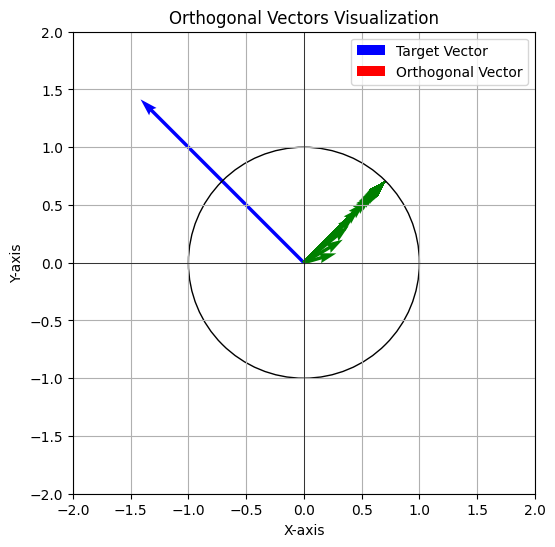

In [39]:
import matplotlib.pyplot as plt
final_vector = vector.numpy()
# Plotting
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black',linewidth=0.5)  # X-axis
plt.axvline(0, color='black',linewidth=0.5)  # Y-axis

# Plot target vector
plt.quiver(0, 0, target_vector[0].numpy(), target_vector[1].numpy(),
           angles='xy', scale_units='xy', scale=1, color='blue', label='Target Vector')

# Plot orthogonal vector
plt.quiver(0, 0, final_vector[0], final_vector[1],
           angles='xy', scale_units='xy', scale=1, color='red', label='Orthogonal Vector')
for i in range(1, len(vector_steps)):
    plt.quiver(0, 0, vector_steps[i][0], vector_steps[i][1],
           angles='xy', scale_units='xy', scale=1, color='green')

# Plot a unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

# Set plot limits
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.title('Orthogonal Vectors Visualization')
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.show()

# Training


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train_arr, y_train_arr), (x_test_arr, y_test_arr) = mnist.load_data()
x_train, x_test, y_train, y_test = tf.convert_to_tensor(x_train_arr), tf.convert_to_tensor(x_test_arr), tf.convert_to_tensor(y_train_arr), tf.convert_to_tensor(y_test_arr)


2024-11-27 08:37:14.925912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732725434.938570  370095 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732725434.942432  370095 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 08:37:14.955065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1732725436.315254  370095 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 66

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/jackson/code/dl/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:

def loss_fn(predictions, labels):
    log_probs = tf.math.log(predictions + 1e-36)
    one_hot = tf.one_hot(labels, 10)
    losses = -tf.reduce_sum(one_hot * log_probs, axis=1)
    return tf.reduce_mean(losses)

pred_train = model(x_train)
loss_fn(pred_train, y_train)



<tf.Tensor: shape=(), dtype=float32, numpy=63.79085922241211>

We would expect a naive model to have a mean log probability of $log(1/10)\approx 2.3$. But in this case, we are getting a higher number, this is because the unutilized model is very confidently wrong. Therefore we get many logs of near 0 values. 

## The Gradient

How do we improve this linear model?

In [ ]:
with tf.GradientTape() as tape:
    pred_train = model(x_train)

    loss = loss_fn( pred_train, y_train)

gradients = tape.gradient(loss, model.trainable_variables)


Reshaped gradient shape: (28, 28, 10)


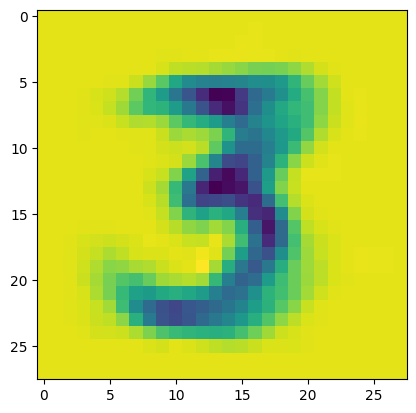

In [ ]:
# let's look at gradients



from matplotlib import pyplot as plt

reshaped_gradient = tf.reshape(gradients[0], (28, 28, 10))
print("Reshaped gradient shape:", reshaped_gradient.shape)

plt.imshow(reshaped_gradient[:,:, 3])